In [3]:
!pip install mlrose-hiive
!pip install import-ipynb
%load_ext autoreload
%autoreload 2

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#load data 
import import_ipynb
import importlib
import framingham_data
importlib.reload(framingham_data)

importing Jupyter notebook from framingham_data.ipynb
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'imblearn'

In [110]:
mlr_data = '/tf/data/mlrose/'
mlr_src = '../'
import mlrose_hiive
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
import sys
import os


sys.path.insert(0, mlr_src)
from Graph import *
from NN_Experiment import *

In [112]:
results = {
    'sa':NNExperiment.pickle_load(os.path.join(mlr_data, 'nnbak','pickle_sa.p'))[0],
    'ga':NNExperiment.pickle_load(os.path.join(mlr_data, 'nnbak','pickle_ga.p'))[0],
    'rhc':NNExperiment.pickle_load(os.path.join(mlr_data, 'nnbak','pickle_rhc.p'))[0]
}
print(results['sa'].raw)

[[4.40342681e+00 3.00000000e+00]
 [4.42968737e+00 5.00000000e+00]
 [4.42874932e+00 7.00000000e+00]
 ...
 [7.10424100e-01 1.37390000e+04]
 [7.09529849e-01 1.37410000e+04]
 [7.09953327e-01 1.37430000e+04]]


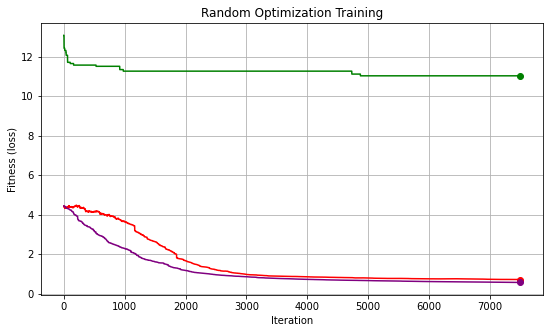

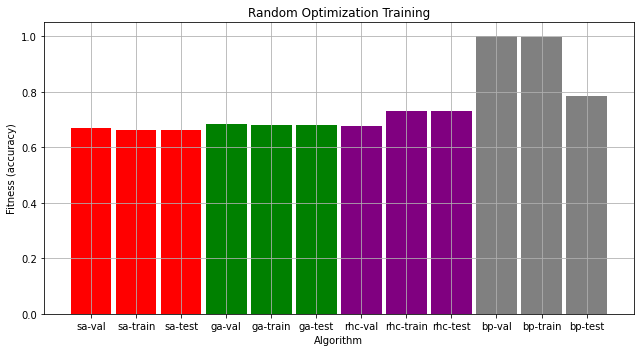

In [115]:
def graph_generate_nn_validation_fitness(experiments, title, x_label, y_label, size=None, fill_end=True, max_x=None):
    plt.rcParams["figure.figsize"] = (9,5)

    fig, ax1 = plt.subplots()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax1.grid()
    w = 0.9
    for exp in experiments:
            sample = experiments[exp]
            label = f'{exp.upper()}'
            val = ax1.bar(exp+'-val', sample.val_score, width=w, color=colors[exp])
            train = ax1.bar(exp+'-train', sample.train_score, width=w, color=colors[exp])
            test = ax1.bar(exp+'-test', sample.train_score, width=w, color=colors[exp], label="hi")
    #values from previous paper
    ax1.bar('bp-val', 1, width=w, color='gray')
    ax1.bar('bp-train', .997, width=w, color='gray')
    ax1.bar('bp-test', .784, width=w, color='gray')
    fig.tight_layout()

def summary_table(experiments):
    for alg in experiments:
        print(alg, experiments[alg])

graph_generate_nn_summary(results, 'Random Optimization Training', 'Iteration','Fitness (loss)')
graph_generate_nn_validation_fitness(results, 'Random Optimization Training', 'Algorithm','Fitness (accuracy)')
# summary_table(results)